### Задача 1

Построим критерий проверки гипотезы $H_0: \theta = \theta_0$ против альтернативы, что $H_1 : \theta \not = \theta_0$, при этом истинное значние лежит в $\{0.9; 1.0; 1.1\}$. 

Тогда в первом случае, проверяя гипотезу, что $H_0: \theta = \theta_0 = 0.9$, можно построить равномено наиболее мощный критерий (по теореме о монотонном отношении правдоподобия), проив гипотезы $H_1: \theta = \theta_1$ и $\theta_1 > \theta_0$ (потому что остались значнеия только больше $\theta_0$). В этому случае критерий уровня значимости $\alpha$ будет выглядить как: $S = \{ \sum\limits X_i \leqslant z_\alpha\}$, где $z_\alpha$ -квантиль уровня $\alpha$ распредления $\Gamma(n, \theta_0)$.


При проверки гипотезы $H_0 : \theta = 1.1$, аналогично строим р. н. м. к. ур значимости $\alpha = 0.05$ $S = \{ \sum X_i \geqslant z_{1 - \alpha} \}$.
Получив ответы на первые 2 гипотезы, мы сможем однозначно определить наше истинное значние. (Надо помнить, что чем больше тестов мы проводим, тем больше шанс ошибиться).

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.integrate as integral
import math

In [18]:
X = np.load("9-1.npy")
print("Размер выборки: {}".format(X.size))
n = X.size
S = np.sum(X)
print("Значения суммы {}".format(S))
alpha = 0.05

Размер выборки: 100
Значения суммы 113.4570549918088


In [20]:
theta0 = 0.9
print("Квантиль уровня alpha гамма распределния {}".format(sps.gamma.ppf(alpha, a = n, scale=1 / theta0)))
theta0 = 1.1
print("Кванитль уровня (1 - alpha) гамма распределения {}".format(sps.gamma.ppf(1 - alpha, a=n, scale=1 / theta0)))

Квантиль уровня alpha гамма распределния 93.48808579812689
Кванитль уровня (1 - alpha) гамма распределения 106.36103131469315


Итак, в случае $\theta_0 = 0.9$ выборка не принадлежит критичекому множеству, поэтому гипотезу мы принимаем (с уровнем значимости $\alpha = 0.05$), во втором случае ($\theta_0 = 1.1)$ выборка принадлежит критическому множеству, поэтому отвергаем вторую гипотезу. Таким образом мы предполагаем, что истинное значение будет $\theta_0 = 0.9$. 

Внизу визуальное подтверждение (эмперическая функция распределния стремится раномерно по т Гливенко Кантелли к истинное функции распределения).

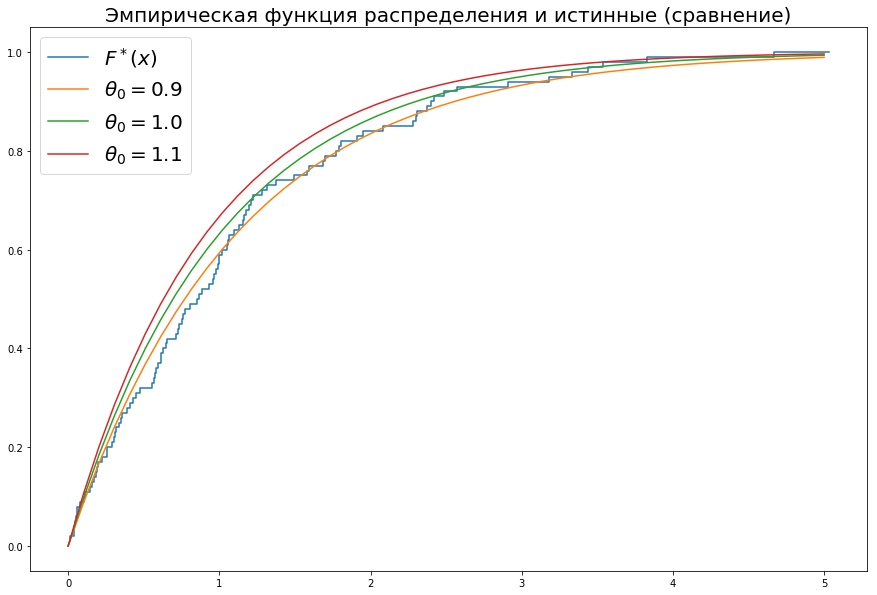

In [42]:
X.sort()
Fn = np.array([(i + 1) / n for i in range(n)])
plt.figure(figsize=(15, 10))
plt.step(X, Fn, label=r"$F^*(x)$")
grid = np.linspace(0, 5)
plt.title("Эмпирическая функция распределения и истинные (сравнение)", fontsize=20)
plt.plot(grid, sps.expon.cdf(grid, scale = 1/ 0.9), label=r"$\theta_0 = 0.9$")
plt.plot(grid, sps.expon.cdf(grid, scale = 1/ 1), label = r"$\theta_0 = 1.0$")
plt.plot(grid, sps.expon.cdf(grid, scale = 1/ 1.1), label=r"$\theta_0 = 1.1$")
plt.legend(loc = 2, fontsize=20)

#### Вывод:
как виддим график только подтверил наши гипотезы, что истинное значние $\theta_0 = 0.9$.

### Задача 2

Построим функцию мощности критерия Стьюдента для выборки из $N(\theta, 1)$ для гипотезы $H_0: \theta = \theta_0 = 0$ vs $H_1: \theta = \theta_1$, где $\theta_1 \in [-10; 10]$. Разберем здесь 2 случая:

1. Пусть $\theta_1 \in [-10; 0)$, то есть $\theta_1 < \theta_0 = 0$. Тогда подберем критерий уровня значимости $\alpha$ так, чтобы он был состоятельным. Например: $S = \{ \sqrt{n-1}\cfrac{\overline{X} - \theta_0}{s} < t_\alpha \}$. Где $t_\alpha$ -это квантиль уровня $\alpha$ распределения Стьюдента $St_{n - 1}$. Как видим в таком случае $P_{\theta_0}(S) = \alpha$. Функция мощности:
$$\beta(S, \theta_1) = P_{\theta_1}(\sqrt{n-1}\frac{\overline{X} - \theta_0}{s} < t_\alpha) = P_{\theta_1}(\sqrt{n-1}\frac{\overline{X} - \theta_1}{s} < t_\alpha + \sqrt{n-1}\frac{\theta_0 - \theta_1}{s}) = F_{St_{n-1}}\left( t_\alpha + \sqrt{n-1}\frac{\theta_0 - \theta_1}{s} \right).$$ Видно что $\beta(S, \theta_1) \to 1$ при верности гипотезы $H_1$, так как $\sqrt{n-1}\frac{\overline{X} - \theta_0}{s} \to -\infty$, то есть критерий состоятельный.

2. Пусть $\theta_1 \in (0; 10]$, то есть $\theta_1 > \theta_0 = 0$. Аналогично состоятельным критерием будет ур значимости $\alpha$: $S = \{ \sqrt{n-1}\cfrac{\overline{X} - \theta_0}{s} > t_{1 - \alpha} \}$. А функция мощности будет: 
$$\beta(S, \theta_1) = 1 - F_{St_{n-1}}\left( t_{1 - \alpha} + \sqrt{n-1}\frac{\theta_0 - \theta_1}{s} \right)$$

Text(0.5,0,'$\\theta$')

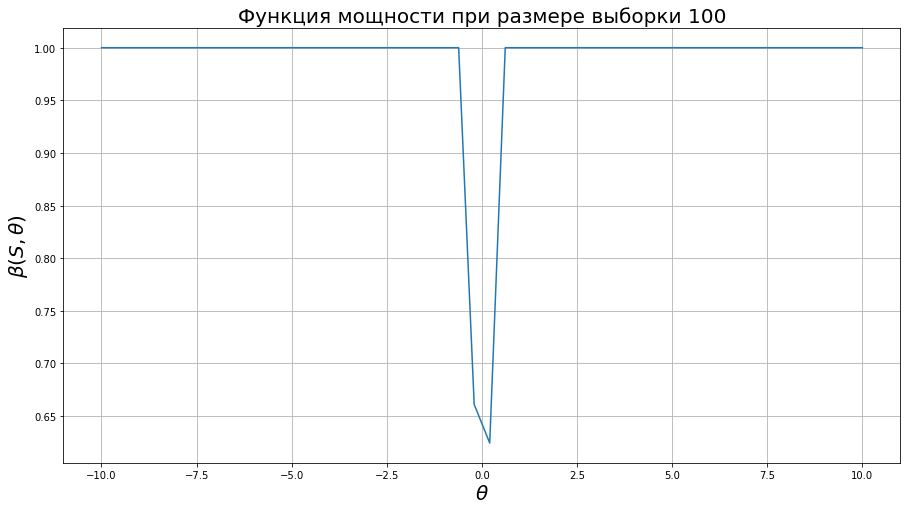

In [4]:
def CalculatePower(X, theta1, theta0):
    alpha = 0.05 #устанавливаем уроень значимости
    n = X.size
    s = np.sqrt(n-1)*(theta0 - theta1) / np.sqrt(np.var(X))
    if (theta1 < theta0):
        q = sps.t.ppf(alpha, df=n-1)
        return sps.t.cdf(q + s, df=n-1)
    if (theta1 > theta0):
        q = sps.t.ppf(1 - alpha, df=n-1)
        return 1 - sps.t.cdf(q + s, df=n-1)

N = 100
theta0 = 0
Theta1 = np.linspace(-10, 10)
Samples = sps.norm.rvs(size = (N, Theta1.size), loc=Theta1, scale=1)
Samples = Samples.transpose()
power = np.zeros(Theta1.size)
for i in range(Samples.shape[0]):
    power[i] = CalculatePower(Samples[i], Theta1[i], theta0)
plt.figure(figsize=(15, 8))
plt.title("Функция мощности при размере выборки 100", fontsize=20)
plt.plot(Theta1, power)
plt.grid()
plt.ylabel(r"$\beta(S, \theta)$", fontsize=20)
plt.xlabel(r"$\theta$", fontsize=20)

На грфике хорошо видна состоятельность нашего критерия. То есть при сильно отклоняющихся значениях $\theta$ от 0 получаем, что мощность практически 1, то совершить ошибку 2 рода очень мала вероятность. Теперь проанализируем как меняется вид впадины при увелечении размера выборки (должен в теории становится уже). 

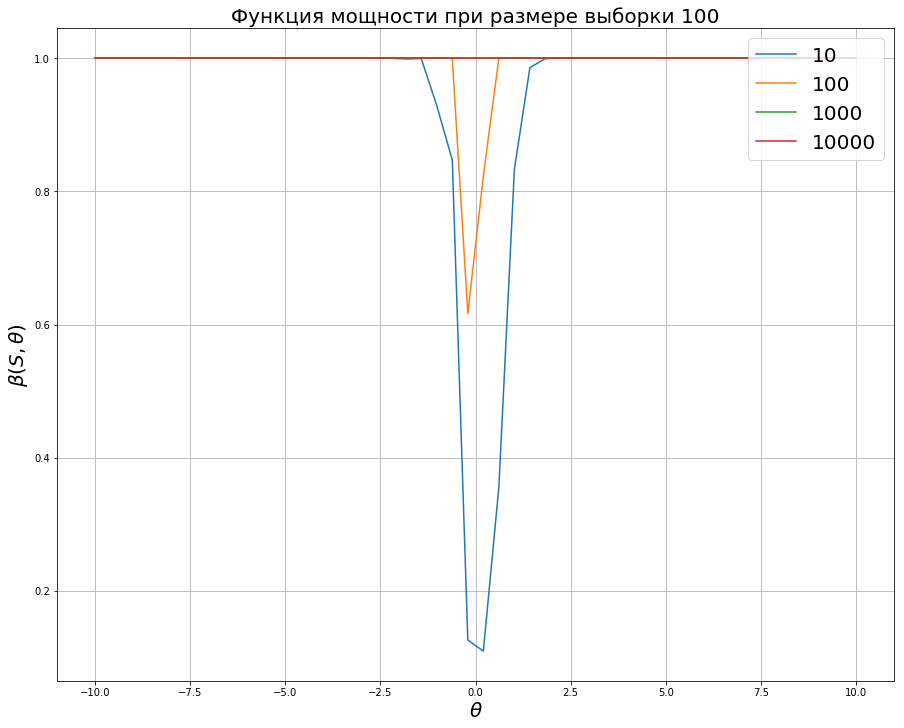

In [39]:
Sizes = np.array([10, 100, 1000, 10000])
plt.figure(figsize=(15, 12))
plt.title("Функция мощности при размере выборки 100", fontsize=20)
for N in Sizes:
    theta0 = 0
    Theta1 = np.linspace(-10, 10)
    Samples = sps.norm.rvs(size = (N, Theta1.size), loc=theta1, scale=1)
    Samples = Samples.transpose()
    power = np.zeros(Theta1.size)
    for i in range(Samples.shape[0]):
        power[i] = CalculatePower(Samples[i], Theta1[i], theta0)
    plt.plot(Theta1, power, label=str(N))
plt.ylabel(r"$\beta(S, \theta)$", fontsize=20)
plt.xlabel(r"$\theta$", fontsize=20)
plt.grid()
plt.legend(fontsize=20, loc=1)

Ну как и ожадалось шиирина впадины - уменьшается, а также глубина ее впадины. То есть чем больше размер выборки,
тем меньше вероятность ошибки второго рода (опять же в силу состоятельности критерия).

Теперь найдем такое минимальное n, что при проверки гипотезы $H_0: \theta = \theta_0$ vs $H_1 : \theta = \theta_1$ и условии $|\theta_0 - \theta_1| = 1$ критерием Стюдента вероятность ошибки первого рода была больше вероятности ошибки второго рода. Напомню, что вероятность ошибки второго рода вычисляется как: $1 - \beta(S, \theta_1)$

Проведем несколько экспериментов для 2 разных случаев и посмотрим как меняет n от эксперимента.

In [6]:
#случай 1, theta1 < theta0
def exp1():
    Theta1 = np.linspace(-10, 9)
    Theta0 = Theta1 + 1
    Sizes = np.arange(2, 100)
    alpha = 0.05
    n_min = np.zeros(Theta1.size)
    for i in range(Theta1.size):
        n_min[i] = -1
        for j in range(Sizes.size):
            X = sps.norm.rvs(size=Sizes[j], loc=Theta1[i], scale=1)
            p = CalculatePower(X, Theta1[i], Theta0[i])
            if(1 - p < alpha and n_min[i] == -1):
                n_min[i] = Sizes[j]
            if(1 - p > alpha):
                n_min[i] = -1
    return np.max(n_min)    #влзвращаем максимальный n из минимальных размеров выборок для разны параметров 
#чтобы выполнялось условие

#сдучай 2, theta1 > theta0
def exp2():
    Theta1 = np.linspace(-9, 10)
    Theta0 = Theta1 - 1
    Sizes = np.arange(2, 100)
    alpha = 0.05
    n_min = np.zeros(Theta1.size)
    for i in range(Theta1.size):
        n_min[i] = -1
        for j in range(Sizes.size):
            X = sps.norm.rvs(size=Sizes[j], loc=Theta1[i], scale=1)
            p = CalculatePower(X, Theta1[i], Theta0[i])
            if(1 - p < alpha and n_min[i] == -1):
                n_min[i] = Sizes[j]
            if(1 - p > alpha):
                n_min[i] = -1
    return np.max(n_min)

#проводим эксперименты и считаем такие n
for i in range(10):   #10 - экспериментов
    print(int(max(exp1(), exp2())))

23
23
27
25
26
27
27
23
23
25


Итак, провели эскперименты и видим что n = 30 будет вполне достаточно, чтобы выполнилось условие (вероятность ошибки 2 рода меньше вероятности ошибки 1-го рода).

### Задача 3

Решаем задачу $H_0: X \sim N(0, \theta)$ vs $H_1: X \sim Laplas(\gamma)$ в байесовском подходе.

Для начала найдем статистику в байесовской подходе проверки гипотез: 
$$ K = \frac{\int\limits_{\Theta}f(X, \theta)q(\theta)d\theta}{\int\limits_{\Gamma}\tilde{f}(X, \gamma)\tilde{q}(\gamma)d\gamma},$$ где $f(X, \theta) \; \text{и} \; \tilde{f}(X, \gamma)$ - функции правдоподобия. В нашем случае: 
$$f(X, \theta) = \left( \frac{1}{\sqrt{2\pi\theta}}\right)^n e^{-\frac{\sum X_i^2}{2\theta}}$$
$$\tilde{f}(X, \gamma) = \left( \frac{1}{2\gamma}\right)^n e^{-\frac{\sum |X_i|}{\gamma}}$$
$$q(x) = \tilde{q}(x) = e^{-x}$$
Так как она не зависит от $\theta$ и $\gamma$, то промоделировав $N = 10000$ разных выборок и найдя точное значение (при разных параметрах) статистики $K$ сможем построить эмпирическое распредление статистики $K$. В нашем случае $\theta, \gamma \sim Exp(1)$ и при верной гипотезе $H_0: X \sim N(0, \theta)$. Таким образом при моделировании будем генерировать выборки из нормального распределения.

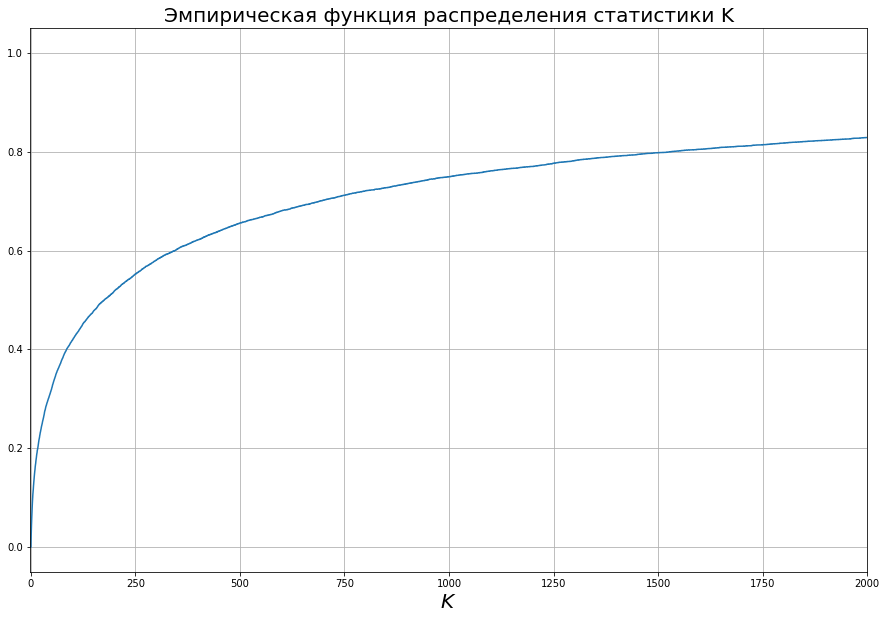

In [36]:
N = 10000
n = 100
def f1(param, X):
    a = (1 / (2 * np.pi * param)**(1/2))**(X.shape[0])
    return a * np.exp(-np.sum(X**2)/ (2 * param) - param)

def f2(param, X):
    return (1 / (2 * param))**(X.shape[0])*np.exp(-np.sum(np.abs(X)) / param - param)

#функция считает статистику K
def CaluclateK(X):
    return integral.quad(f1, 0, +np.inf, args=(X, ))[0] / (integral.quad(f2, 0, +np.inf, args=(X, ))[0]) 

#генерируем параметры
params = sps.expon.rvs(1, size=N)
K = np.zeros(N)
for i in range(params.shape[0]):
    X = sps.norm.rvs(size=n, loc=0, scale=params[i]**(1/2)) 
    K[i] = CaluclateK(X)
K.sort()
F = np.arange(1, N + 1)
F = F / N
#строим график эмпирического распределения
plt.figure(figsize=(15, 10))
plt.title("Эмпирическая функция распределения статистики K", fontsize=20)
plt.step(K, F)
plt.xlim(-2, 2000)
plt.xlabel(r"$K$", fontsize=20)
plt.grid()

Итак, посчитали эмпирическую функцию распределения, осталось только найти значение статистики $K$ на нашей выборке.  Посчитаем также квантиль уровня $\alpha = 0.05$ и сделаем критическое множество $S = \{ K(X) < z_\alpha\}$. Таким образом размер критерия будет $\alpha = 0.05$.

In [40]:
print("Квантиль уровня 0.05 q = {}".format(K[500]))
X = np.load("9-3.npy")
K_sample = CaluclateK(X)
print("На нашей выборке K = {}".format(K_sample))

Квантиль уровня 0.05 q = 1.5725254559120951
На нашей выборке K = 27573.75412425884


Итак, так как $K(X) \gg z_\alpha$ следовательно мы принимаем нашу гипотезу.